In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from rcpl.config import BASE_DIR

In [2]:
from rcpl.rcpl import Experiment

ImportError: cannot import name 'Experiment' from 'rcpl.rcpl' (/mnt/ssd/Data/MyProjects/2023.academy.thermomechanics.rene.random_cyclic_plastic_loading/src/rcpl/rcpl.py)

In [4]:
df_exp = pd.read_csv(BASE_DIR / 'data' / 'AluminumStabilizationDiskr.csv')
df_exp['epsp'] = df_exp['eps'] - df_exp['sig']/68000

In [5]:
epsp = df_exp['epsp'].to_numpy()[:601]

In [6]:
gen_epsp = Experiment.random_experiment([0.003, 0.005, 43], 15).epsp

NameError: name 'Experiment' is not defined

In [6]:
(gen_epsp[14]-gen_epsp[13]) / (gen_epsp[1]-gen_epsp[0])

20.000000000000018

In [7]:
data_min = min(np.min(gen_epsp[:len(epsp)]), np.min(epsp))
data_max = max(np.max(gen_epsp[:len(epsp)]), np.max(epsp))
bins = np.linspace(data_min, data_max, 21)  # e.g., 50 bins

plt.figure(figsize=(12,4))
sns.histplot(gen_epsp[:len(epsp)], bins=bins, label='newly generated epsp')
sns.histplot(epsp, bins=bins, label='epsp from experiment')

plt.legend()
plt.show()

NameError: name 'gen_epsp' is not defined

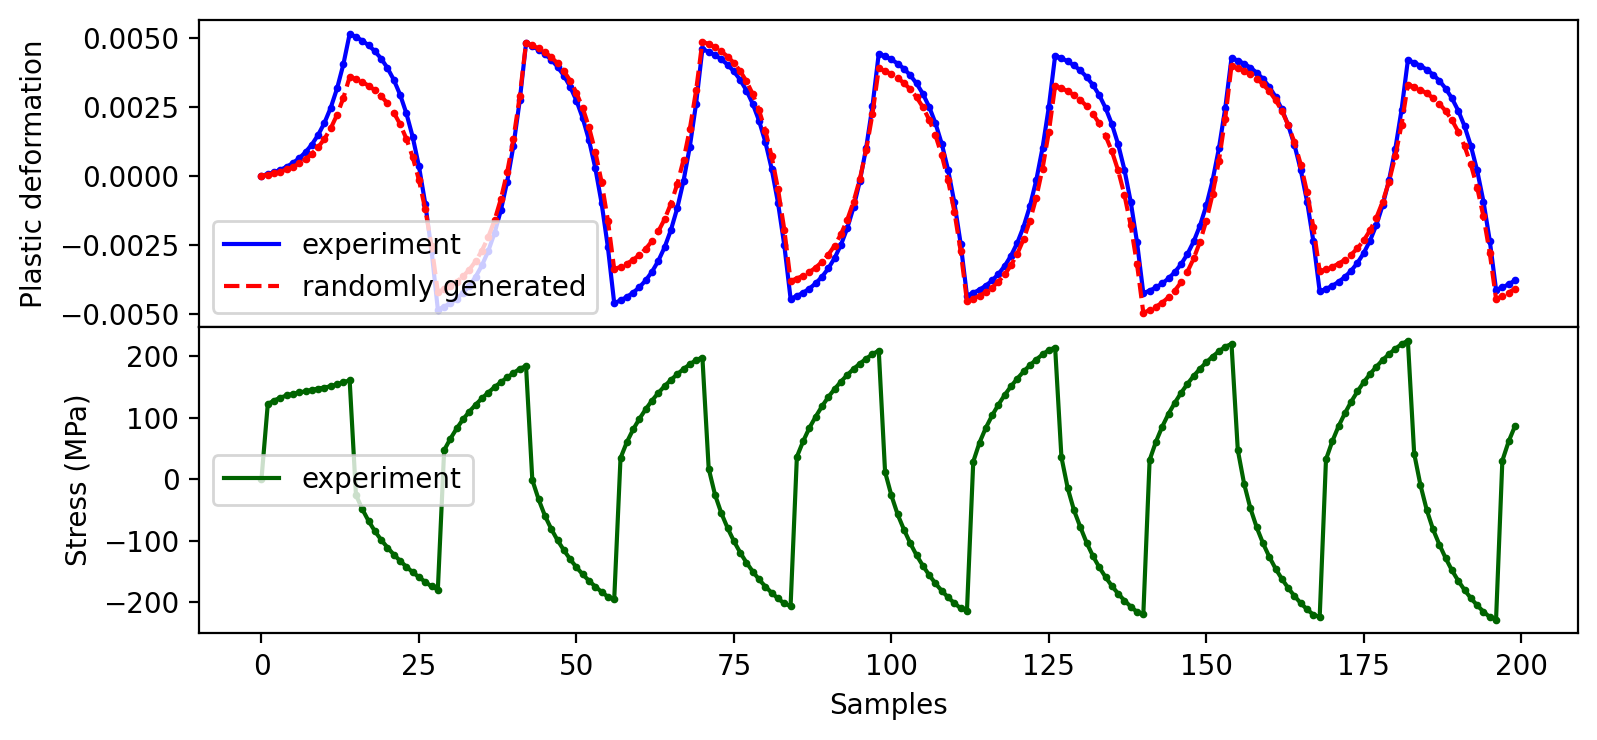

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(8, 3.8), dpi=200, sharex=True)
markersize = 3.5
# First plot
axs[0].plot(epsp[:200], '.', color="blue", markersize=markersize)
axs[0].plot(epsp[:200], color="blue", label="experiment")
axs[0].plot(gen_epsp[:200], color='red',label="randomly generated", ls="--")
axs[0].plot(gen_epsp[:200], '.',  color='red', markersize=markersize)
axs[0].legend()
axs[0].set_ylabel('Plastic deformation')

# Second plot
axs[1].plot(df_exp[:200]['sig'], color='darkgreen', label="experiment")
axs[1].plot(df_exp[:200]['sig'], '.', color='darkgreen', markersize=markersize)
axs[1].legend()
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Stress (MPa)')

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
# fig.savefig('epsp_comparison_combined.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
df_exp_full = pd.read_csv(BASE_DIR / 'data' / 'AluminumStabilizationSource.csv')
df_exp_full['epsp'] = df_exp_full['eps'] - df_exp_full['sig']/68000

[]

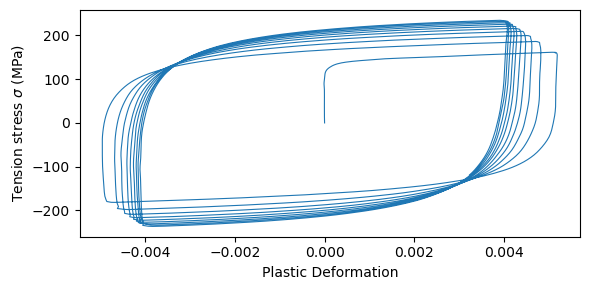

In [10]:
max_lim = 2000
plt.figure(figsize=(6,3))
plt.plot(df_exp_full['epsp'][:max_lim].to_numpy(), df_exp_full['sig'][:max_lim].to_numpy(), label='Experimental data', lw=0.8)
# sns.lineplot(df_sim[:200]['sig'], label='sim')
plt.xlabel('Plastic Deformation')
plt.ylabel('Tension stress $\\sigma$ (MPa)')
plt.tight_layout()
plt.savefig('/home/martin/Data/PhD/2023.USA.Rene.FJFI/images/full_cycle.pdf', bbox_inches='tight', pad_inches=0)
plt.plot()

In [13]:
df_exp['epsp'][:603].to_numpy()

array([ 0.00000000e+00,  5.50764706e-05,  1.24464706e-04,  2.11835294e-04,
        3.21841176e-04,  4.60276471e-04,  6.34676471e-04,  8.54352941e-04,
        1.13081176e-03,  1.47900000e-03,  1.91738235e-03,  2.46936471e-03,
        3.16440588e-03,  4.03960000e-03,  5.14147059e-03,  5.03433824e-03,
        4.89935000e-03,  4.72947059e-03,  4.51556176e-03,  4.24617941e-03,
        3.90704118e-03,  3.47993529e-03,  2.94208706e-03,  2.26505000e-03,
        1.41236176e-03,  3.38782353e-04, -1.01290000e-03, -2.71519412e-03,
       -4.85838235e-03, -4.75487647e-03, -4.62467059e-03, -4.46059706e-03,
       -4.25409412e-03, -3.99398235e-03, -3.66658235e-03, -3.25420000e-03,
       -2.73489176e-03, -2.08109235e-03, -1.25792353e-03, -2.21458824e-04,
        1.08390588e-03,  2.72732353e-03,  4.79647059e-03,  4.69560147e-03,
        4.56848824e-03,  4.40842941e-03,  4.20694412e-03,  3.95322353e-03,
        3.63372353e-03,  3.23137059e-03,  2.72479471e-03,  2.08701353e-03,
        1.28388824e-03,  